In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/content/sample_data/sales_data_sample.csv',encoding='ISO-8859-1')


In [7]:
data = data.dropna()  # Dropping rows with null values; adjust based on data requirements


In [8]:
features = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]


In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS


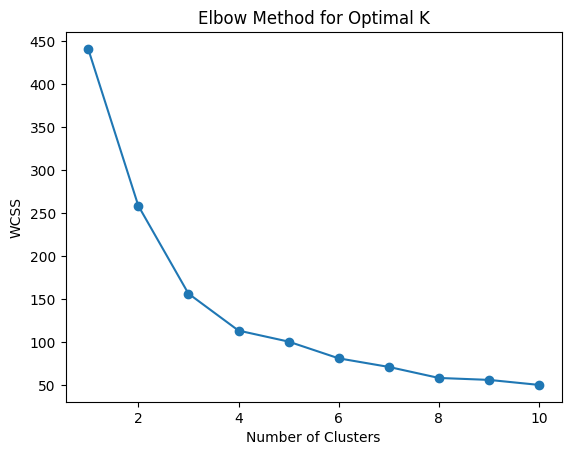

In [11]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Based on the elbow graph, choose the optimal number of clusters (e.g., 3)
# Apply K-Means clustering with the chosen number of clusters
optimal_clusters = 3  # Replace with the actual number from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [13]:
print(data[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']].head())


      SALES  QUANTITYORDERED  PRICEEACH  Cluster
10  3965.66               37     100.00        2
21  1451.00               20      72.55        0
40  4905.39               21     100.00        2
47  3944.70               30     100.00        2
51  2416.56               24     100.00        2
